# Statystyka matematyczna - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu:2.39
Członkowie:Maria Kiraga, Bartosz Krzysik, Anna Suska,Karolina Zając

---

# Zestaw zadań 4: Elementy eksploracyjnej analizy danych

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
from scipy.stats import kurtosis, skew
import math

### Dane do zadań

Plik wine_data.csv zawiera wyniki pomiarów kilku wybranych parametrów win pochodzących z tego samego rejonu Włoch, ale wyprodukowanych z trzech różnych odmian (ang. cultivar) winogron:

 - Alcohol (Alkohol) - procentowa zawartości alkoholu w winie.
 - Malic acid (kwas jabłkowy) - rodzaj kwasu obecnego w winogronach i innych owocach.
 - Ash (popiół) - reprezentuje pozostałości po fermentacji winogron, obejmujące składniki mineralne, takie jak potas i wapń.
 - Flavanoids (flawonoidy) - rodzaj związku fenolowego.
 - Color intensity (intensywność koloru) - mierzy jak głęboki lub intensywny jest kolor.
 - OD280/OD315 (absorbancja przy 280/315 nm wina rozcieńczonego) - miara absorpcji światła przy określonych długościach fal.

W celu wczytania danych do notatnika umieść plik w tym samym folderze, w którym znajduje się notatnik.

Źródło danych: Aeberhard S., Forina M. Leardi R.; Wine; DOI: 10.24432/C5PC7J; https://archive.ics.uci.edu/dataset/109/wine

In [3]:
data = pd.read_csv("wine_data.csv", delimiter=",", index_col=0)
data.head(10)

,Cultivar,Alcohol,Malic acid,Ash,Flavanoids,Color intensity,OD280/OD315
0,2,11.81,2.12,2.74,0.99,2.50,2.26
1,3,13.40,4.60,2.86,0.96,8.50,1.92
2,1,13.56,1.71,2.31,3.29,6.13,3.38
3,3,13.73,4.36,2.26,0.47,6.62,1.75
4,2,12.17,1.45,2.53,1.75,2.95,2.23
5,3,14.13,4.10,2.74,0.76,9.20,1.60
6,1,13.68,1.83,2.36,2.69,3.84,2.87
7,3,13.40,3.91,2.48,0.75,7.30,1.56
8,1,13.86,1.35,2.27,3.15,7.22,3.55
9,2,12.33,1.10,2.28,1.09,3.27,1.67


### Zadanie 1: Wybrane typy wykresów [4 pkt]

Korzystając z funkcji `seaborn.boxplot()`, `seaborn.violinplot()`, `seaborn.stripplot()` i `seaborn.swarmplot()` przygotuj wykresy wybranego przez siebie parametru (oś Y) z podziałem na poszczególne odmiany winogron (oś X).

Wykresy (po jednym każdego typu) zestaw na pojedynczej figurze (2x2 pola na wykres). Przygotowując figurę kieruj się wytycznymi z początku notatnika. Dodatkowo ustaw:
 - dla wykresu boxplot:
     - inny od domyślnego kolor wykresu oraz widoczny znacznik wartości średniej,
 - dla wykresu violinplot:
     - inny od domyślnego kolor wykresu,
 - dla wykresu stripplot:
     - inne od domyślnych rozmiar, kolor i przeźroczystość punktów (dobierz parametry tak, aby wykres był jak najbardziej przejrzysty),
 - dla wykresu swarmplot:
     - inne od domyślnych rozmiar i kolor punktów (dobierz rozmiar tak, aby na wykresie zmieścił się komplet punktów).


[Text(0.5, 1.0, 'Swarmplot')]

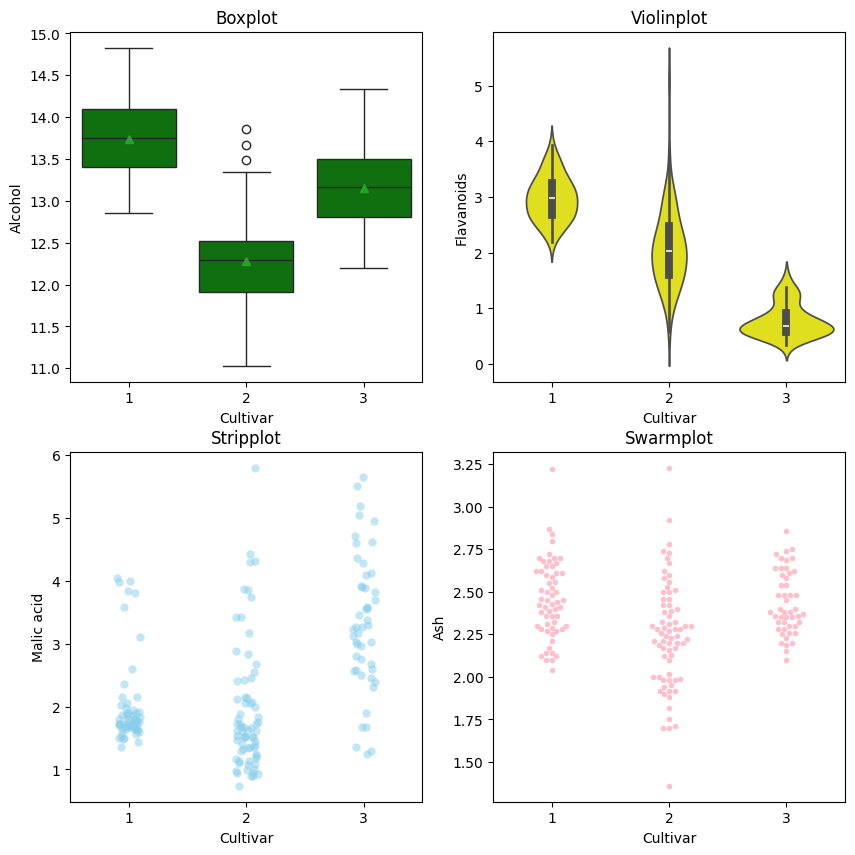

In [4]:
# YOUR CODE HERE
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.boxplot(x=data['Cultivar'], y=data['Alcohol'], color="green",showmeans=True, ax=axes[0,0]).set(title='Boxplot')
sns.violinplot(x=data['Cultivar'], y=data['Flavanoids'], color='yellow', ax=axes[0,1]).set(title='Violinplot')
sns.stripplot(x=data['Cultivar'], y=data['Malic acid'], color='skyblue', size=6, alpha=0.5, ax=axes[1,0]).set(title='Stripplot')
sns.swarmplot(x=data['Cultivar'], y=data['Ash'], size=4,color='pink', ax=axes[1,1]).set(title='Swarmplot')
#raise NotImplementedError()

### Zadanie 2: Przygotowanie wykresów do analizy danych ze względu na jedną cechę [6 pkt]

#### a) Wykresy boxplot lub violinplot
Korzystając z funkcji `seaborn.boxplot()` lub `seaborn.violinplot()` (wybierz preferowany przez siebie typ wykresu) przygotuj wykresy wszystkich parametrów (oś Y) z podziałem na poszczególne odmiany winogron (oś X).

Wykresy zestaw na pojedynczej figurze (2x3 pola na wykres). Przygotowując figurę kieruj się wytycznymi z początku notatnika (nie musisz jednak ustawiać tytułów poszczególnych wykresów). Dodatkowo ustaw:
 - identyczną dla wszystkich wykresów i inną od domyślnej skalę kolorów (każda odmiana ma przypisany inny kolor wykresu),
 - brak widocznej legendy na wykresach,
 - widoczny znacznik wartości średniej.

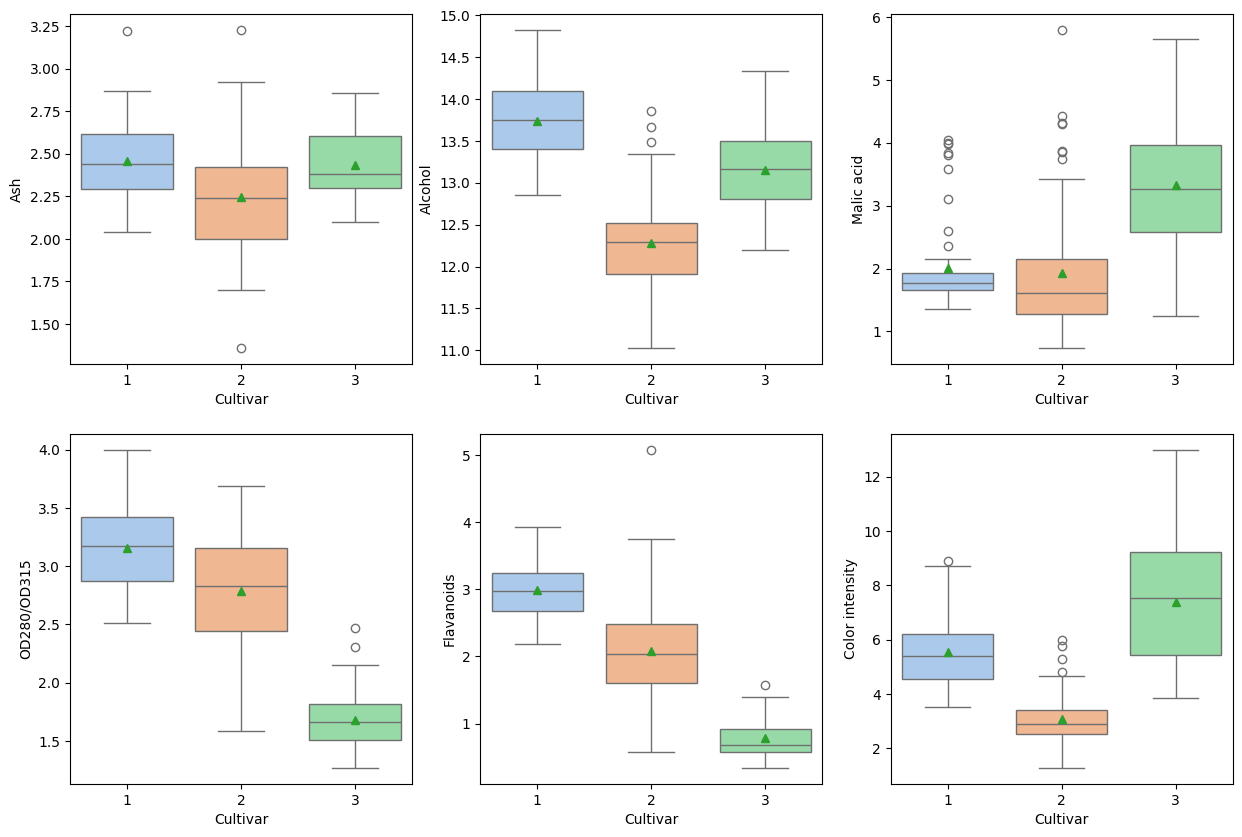

In [5]:
# YOUR CODE HERE
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, param in enumerate(data.columns):
    row = (i -1)// 3
    col = i % 3
    if param=='Cultivar':
        continue
    sns.boxplot(x=data['Cultivar'], y=param, data=data,hue=data['Cultivar'], ax=axes[row, col],palette='pastel', showmeans=True, legend=False)
plt.show()
#raise NotImplementedError()

#### b) Wykresy stripplot lub swarmplot

Korzystając z funkcji `seaborn.stripplot()` lub `seaborn.swarmplot()` (wybierz preferowany przez siebie typ wykresu) przygotuj wykresy wszystkich parametrów (oś Y) z podziałem na poszczególne odmiany winogron (oś X).

Wykresy zestaw na pojedynczej figurze (2x3 pola na wykres). Przygotowując figurę kieruj się wytycznymi z początku notatnika (nie musisz jednak ustawiać tytułów poszczególnych wykresów). Dodatkowo ustaw:
 - identyczną dla wszystkich wykresów i inną od domyślnej skalę kolorów (każda odmiana ma przypisany inny kolor wykresu),
 - brak widocznej legendy na wykresach,
 - inne od domyślnych rozmiar i przeźroczystość punktów.

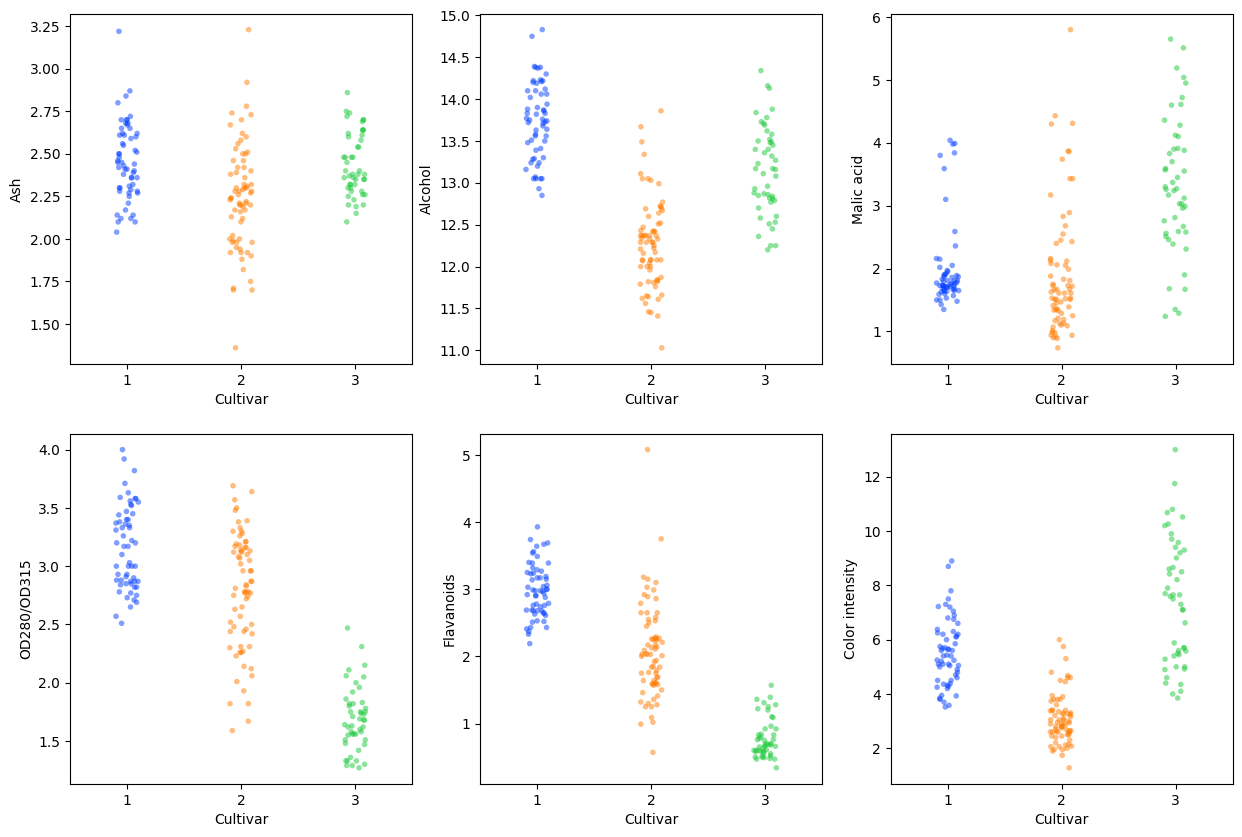

In [6]:
# YOUR CODE HERE
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, param in enumerate(data.columns):
    row = (i -1)// 3
    col = i % 3
    if param=='Cultivar':
        continue
    sns.stripplot(x=data['Cultivar'],y=param, data=data, hue=data['Cultivar'], palette='bright', legend=False, size=4, alpha=0.5, ax=axes[row,col])
plt.show()

#raise NotImplementedError()

### Zadanie 4: Podstawowe statystyki opisowe [3 pkt]

Koszystając z funkcji `pandas.Dataframe.descrtibe()` przygotuj tablicę `statistics` z podstawowymi statystykami opisowymi rozkładów poszczególnych parametrów.
Następnie korzystając z odpowiednich funkcji pakietu scipy.stats (https://docs.scipy.org/doc/scipy/reference/stats.html#summary-statistics) dodaj na końcu tablicy wiersze o nazwach "skew" i "kurt" z obliczonymi wartościami skośności i kurtozy rozkładów poszczególnych parametrów.

In [7]:
# YOUR CODE HERE

stats = pd.DataFrame(data=data)
statistics = stats.describe()
kurt = kurtosis(data)
skewy = skew(data)
statistics.loc['skew'] = skewy
statistics.loc['kurt'] = kurt
print(statistics)
print(skewy, kurt)

         Cultivar     Alcohol  Malic acid         Ash  Flavanoids  \
count  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517    2.029270   
std      0.775035    0.811827    1.117146    0.274344    0.998859   
min      1.000000   11.030000    0.740000    1.360000    0.340000   
25%      1.000000   12.362500    1.602500    2.210000    1.205000   
50%      2.000000   13.050000    1.865000    2.360000    2.135000   
75%      3.000000   13.677500    3.082500    2.557500    2.875000   
max      3.000000   14.830000    5.800000    3.230000    5.080000   
skew     0.106524   -0.051047    1.030869   -0.175207    0.025129   
kurt    -1.319440   -0.862260    0.257348    1.078576   -0.889365   

       Color intensity  OD280/OD315  
count       178.000000   178.000000  
mean          5.058090     2.611685  
std           2.318286     0.709990  
min           1.280000     1.270000  
25%           3.220000     1.937500  
50%         

In [8]:
# Komórka testowa
assert type(statistics) == pd.DataFrame
assert statistics.shape == (10, 7)
assert np.all(statistics.columns == ['Cultivar', 'Alcohol', 'Malic acid', 'Ash', 'Flavanoids', 'Color intensity', 'OD280/OD315'])
assert np.all(statistics.index == ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'skew','kurt'])
assert np.all(np.isclose(np.sum(statistics.values, axis=0), [189.50032053, 255.84913695, 195.8317122 , 193.26173022, 191.79889282, 214.96499357, 193.08481056]))
assert np.all(np.isclose(np.sum(statistics.values, axis=1), [1246., 29.34073033, 7.00548662, 17.02, 23.5375, 28.88, 34.5625, 48.94, 1.49282653, -2.48744664]))

### Zadanie 5: Korelacja liniowa [7 pkt]

#### a) Manualne obliczanie korelacji liniowej
Korzystając ze wzorów manualnie oblicz współczynnik korelacji liniowej `r` parametrów OD280/OD315 (oś X) i Flavanoids (oś Y).

In [9]:
# Współczynnik korelacji liniowej
# YOUR CODE HERE
Flavanoids = data["Flavanoids"]
OD280 = data["OD280/OD315"]

Flavanoids_mean=0
for i in range(len(Flavanoids)):
    Flavanoids_mean+=Flavanoids[i]
Flavanoids_mean/=len(Flavanoids)

OD280_mean = 0
for i in range(len(OD280)):
    OD280_mean +=OD280[i]
OD280_mean/=len(OD280)

Flavanoids_std = 0
for i in range(len(Flavanoids)):
    Flavanoids_std+=(Flavanoids[i]-Flavanoids_mean)**2
Flavanoids_std = math.sqrt(Flavanoids_std)

OD280_std = 0
for i in range(len(OD280)):
    OD280_std+=(OD280[i]-OD280_mean)**2
OD280_std = math.sqrt(OD280_std)

r = 0
for i in range(178):
    r+=(Flavanoids[i]-Flavanoids_mean)*(OD280[i]-OD280_mean)
r/=(OD280_std*Flavanoids_std)

In [10]:
# Komórka testowa
assert np.isclose(r, 0.7871939018669515)

#### b) Obliczanie korelacji liniowej z wykorzystaniem dedykowanych funkcji

Korzystając ze funkcji `pandas.DataFrame.corr()` przygotuj tablice współczynników korelacji liniowej `r_table` wszystkich możliwych par analizowanych parametrów.

In [11]:
# Współczynniki korelacji liniowej
# YOUR CODE HERE
r_table=data.corr()
r_table
#raise NotImplementedError()

,Cultivar,Alcohol,Malic acid,Ash,Flavanoids,Color intensity,OD280/OD315
Cultivar,1.000000,-0.328222,0.437776,-0.049643,-0.847498,0.265668,-0.788230
Alcohol,-0.328222,1.000000,0.094397,0.211545,0.236815,0.546364,0.072343
Malic acid,0.437776,0.094397,1.000000,0.164045,-0.411007,0.248985,-0.368710
Ash,-0.049643,0.211545,0.164045,1.000000,0.115077,0.258887,0.003911
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,1.000000,-0.172379,0.787194
Color intensity,0.265668,0.546364,0.248985,0.258887,-0.172379,1.000000,-0.428815
OD280/OD315,-0.788230,0.072343,-0.368710,0.003911,0.787194,-0.428815,1.000000


In [12]:
# Komórka testowa
assert type(r_table) == pd.DataFrame
assert r_table.shape == (7, 7)
assert list(r_table.columns) == list(r_table.index)
assert np.all(r_table.values>=-1)
assert np.all(r_table.values<=1)
assert np.all(r_table.mean(axis=0) == r_table.mean(axis=1))

#### c) Wizualizacja współczynników korelacji

Wykorzystaj funkcję `seaborn.heatmap()` do zwizualizowania obliczonych wartości współczynników korelacji liniowej i współczynników determinacji liniowej.

Przygotowując figurę kieruj się wytycznymi z początku notatnika. Dodatkowo ustaw:
 - inną od domyślnej skalę kolorów,
 - widoczne na wykresie wartości współczynników.

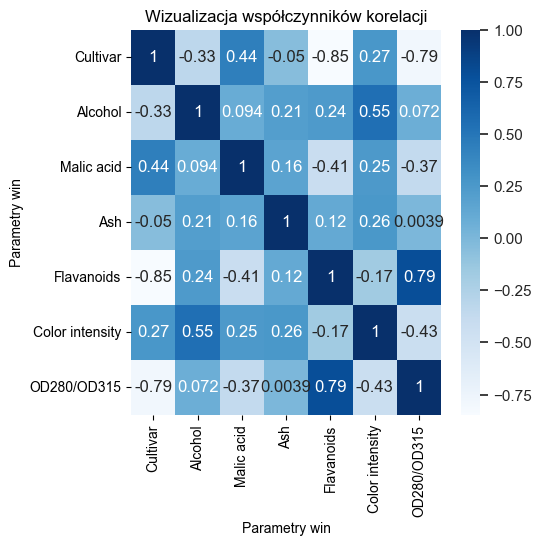

In [13]:
# YOUR CODE HERE
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
sns.set(rc={ 'figure.facecolor':'white' })
sns.heatmap(data = r_table, annot=True, cmap = "Blues", ax=axes)
axes.set_title("Wizualizacja współczynników korelacji")
axes.set_xlabel("Parametry win")
axes.set_ylabel("Parametry win")
plt.show()

#### d) Wykresy korelacyjne

Korzystając z funkcji `seaborn.pairplot()` przygotuj wykresy korelacyjne zestawiające ze sobą poszczególne parametry (osie X, Y) z podziałem na poszczególne odmiany winogron (rozróżnione kolorem) i ustaw:
 - inną od domyślnej skalę kolorów (każda odmiana ma przypisany inny kolor wykresu),
 - inne od domyślnych własności punktów (kształt, wielkość, przeźroczystość) dobrane tak, aby wykres był jak najbardziej czytelny.

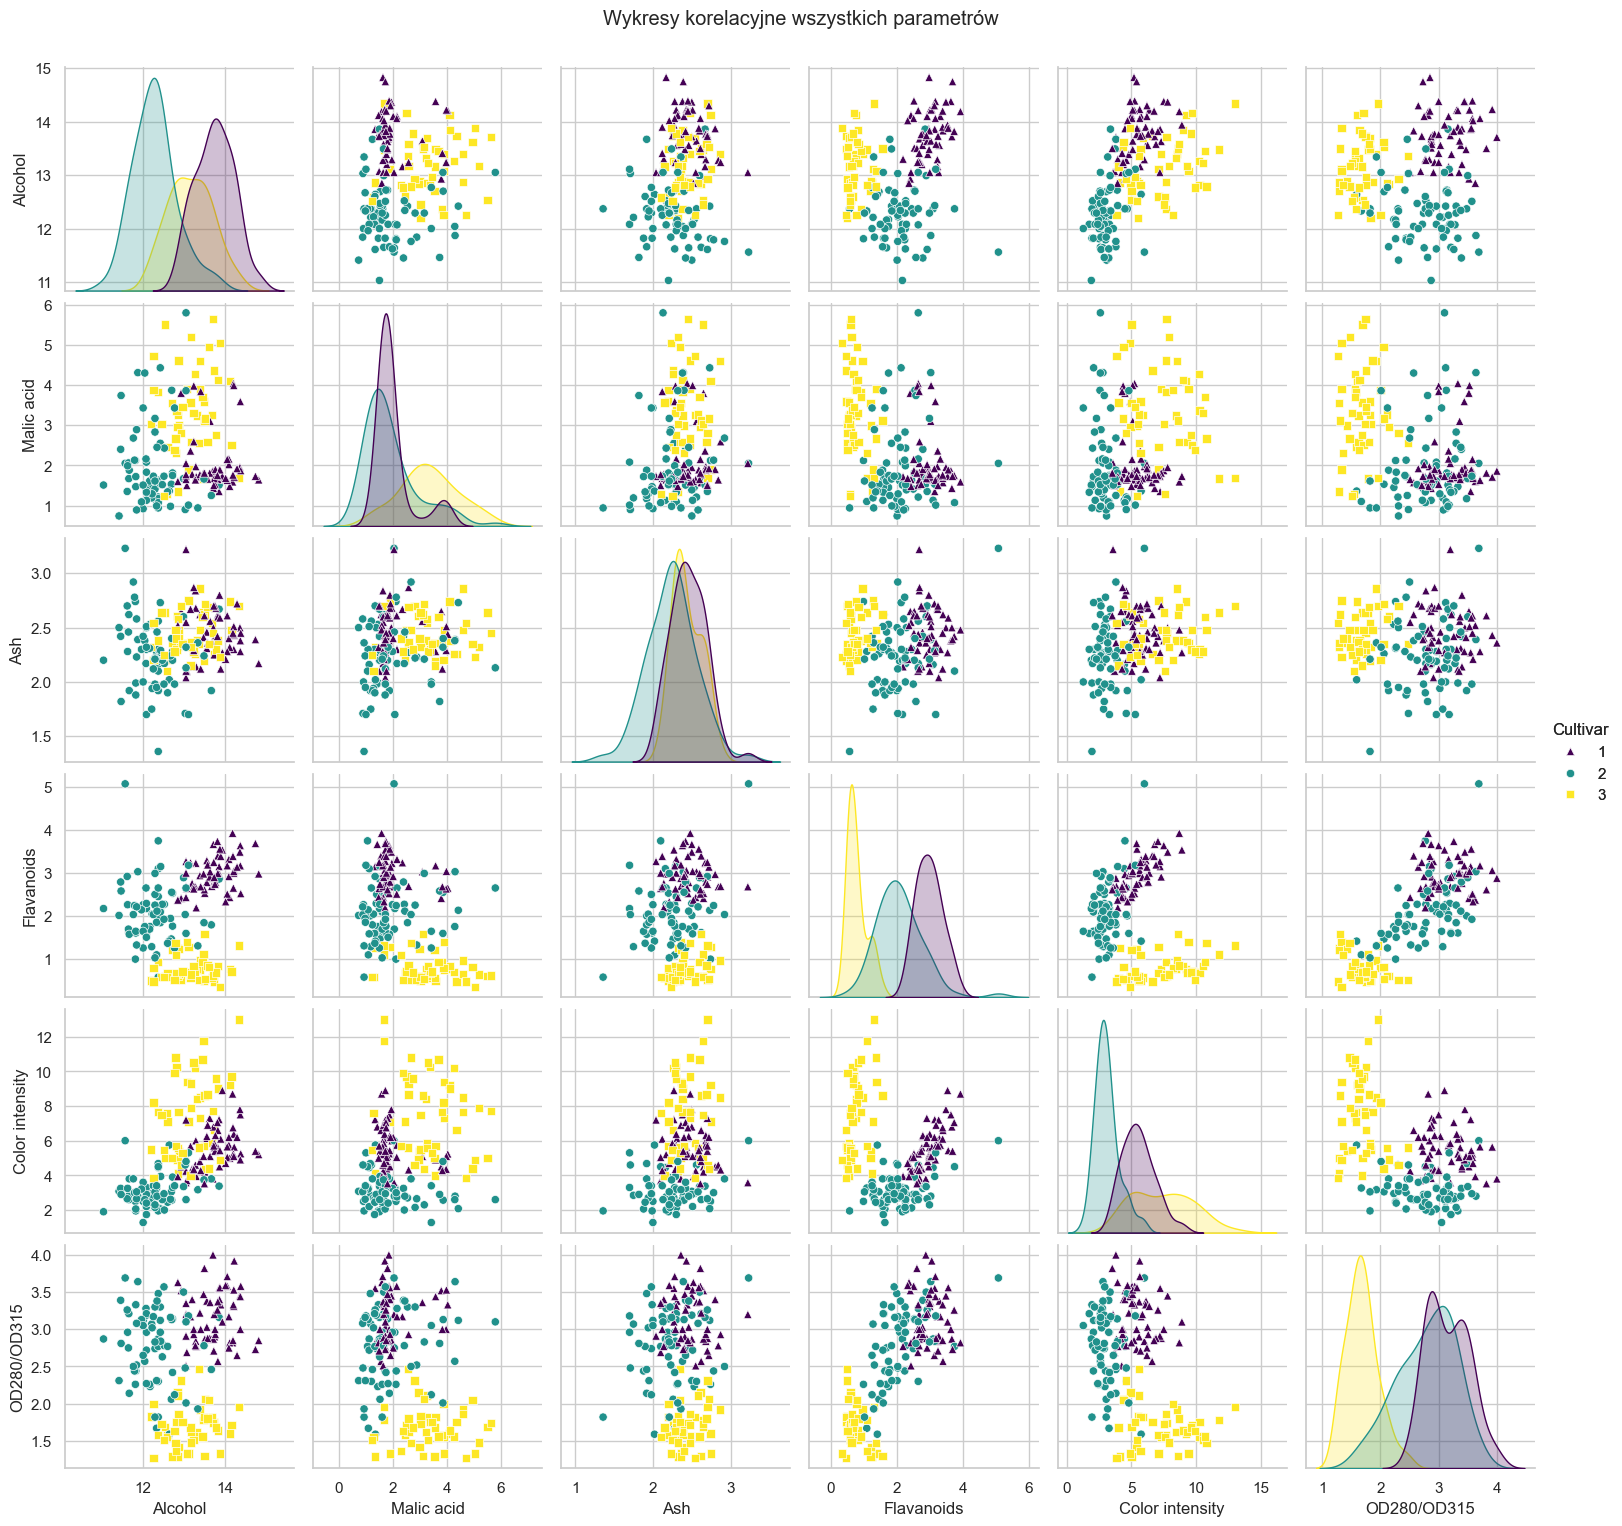

In [26]:
# YOUR CODE HERE
markers = {class_label: marker for class_label, marker in zip(data['Cultivar'].unique(), ['o', 's', '^'])}
sns.set(style='whitegrid', rc={'figure.facecolor': 'white'})
pairplot = sns.pairplot(data=data, vars=["Alcohol", "Malic acid", "Ash", "Flavanoids", "Color intensity", "OD280/OD315"],
                        hue="Cultivar", palette='viridis', markers=markers)
pairplot.fig.suptitle("Wykresy korelacyjne wszystkich parametrów", y=1.02)
pairplot.add_legend()


### Zadanie 6: Regresja liniowa [10 pkt]

#### a) Manualne obliczanie współczynników równania regresji liniowej

Korzystając z metody najmniejszych kwadratów manualnie oblicz współczynniki równania regresji liniowej `a_1` i `b_1` parametru OD280/OD315 (oś Y) od Flavanoids (oś X).

In [15]:
# YOUR CODE HERE
y = data['Flavanoids']
x = data['OD280/OD315']
mean_y = y.mean()
mean_x = x.mean()

a_1 = sum((x-mean_x)*(y-mean_y))/sum((x-mean_x)**2)
print(a_1)
b_1 = mean_y - a_1 * mean_x
print(b_1)

1.107473331774143
-0.8631022610964245


In [16]:
# Komórka testowa
assert np.isclose(a_1, 1.107473331774143)
assert np.isclose(b_1, -0.8631022610964245)

#### b) Obliczanie współczynników równania regresji liniowej z wykorzystaniem dedykowanych funkcji

Korzystając z funkcji `scipy.stats.linregress()` oblicz współczynniki równania regresji liniowej `a_2` i `b_2` parametru OD280/OD315 (oś Y) od Flavanoids (oś X).

In [17]:
# YOUR CODE HERE
res = sp.stats.linregress(x, y)
a_2 = res.slope
b_2 = res.intercept
print(a_2, b_2)

1.1074733317741432 -0.863102261096425


In [24]:
# Komórka testowa
assert np.isclose(a_2, 1.1074733317741432)
assert np.isclose(b_2, -0.863102261096425)

#### c) Porównanie wyników z wizualizacją

Funkcja `seaborn.regplot()` pozwala na wykonanie wykresu korelacyjnego, jednak nie zwraca wyliczonych współczynników regresji. W celu przetestowania identyczności obu rozwiązań wykonaj wykres z wykorzystaniem funkcji `seaborn.regplot()` i korzystając z funkcji `matplotlib.pyplot.plot()` lub `seaborn.lineplot()` nałóż na niego przerywaną linię wyznaczoną na podstawie wyliczonych wcześniej współczynników równania regresji liniowej parametru OD280/OD315 (oś Y) od Flavanoids (oś X).

Przygotowując figurę kieruj się wytycznymi z początku notatnika

Text(0.5, 1.0, 'Wykres korelacji z linią regresji')

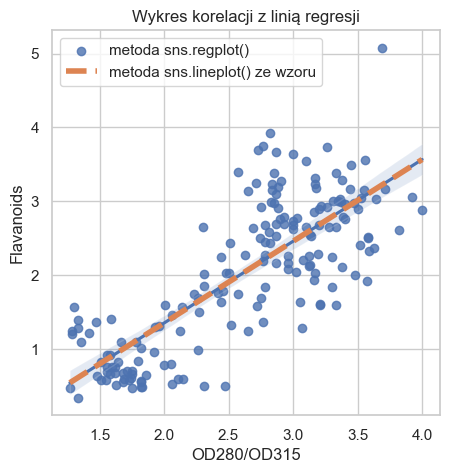

In [19]:
# YOUR CODE HERE
fig, axes = plt.subplots(1, 1, figsize=(5, 5), facecolor='white')

sns.regplot(data, x='OD280/OD315', y='Flavanoids', label='metoda sns.regplot()')
sns.lineplot(data, x='OD280/OD315', y = a_2 * x + b_2, linestyle='--', linewidth=4, label='metoda sns.lineplot() ze wzoru')
axes.set_title("Wykres korelacji z linią regresji")

#### d) Wykresy korelacyjne z prostą regresji

Korzystając z funkcji `seaborn.pairplot()` przygotuj wykresy korelacyjne z prostą regresji zestawiające ze sobą poszczególne parametry (osie X, Y) dla kompletu danych oraz z podziałem na poszczególne odmiany winogron (rozróżnione kolorem) i ustaw:
 - dla wykresu z całością danych inny od domyślnego kolor, a dla wykresu z podziałem na odmiany inną od domyślnej skalę kolorów (każda odmiana ma przypisany inny kolor wykresu),
 - inne od domyślnych własności punktów (kształt, wielkość, przeźroczystość) dobrane tak, aby wykres był jak najbardziej czytelny.
 - prosta regresji wyświetlana bez przedziału ufności.
 - na przekątnej siatki wykresów wyświetlały się wykresy typu kde.

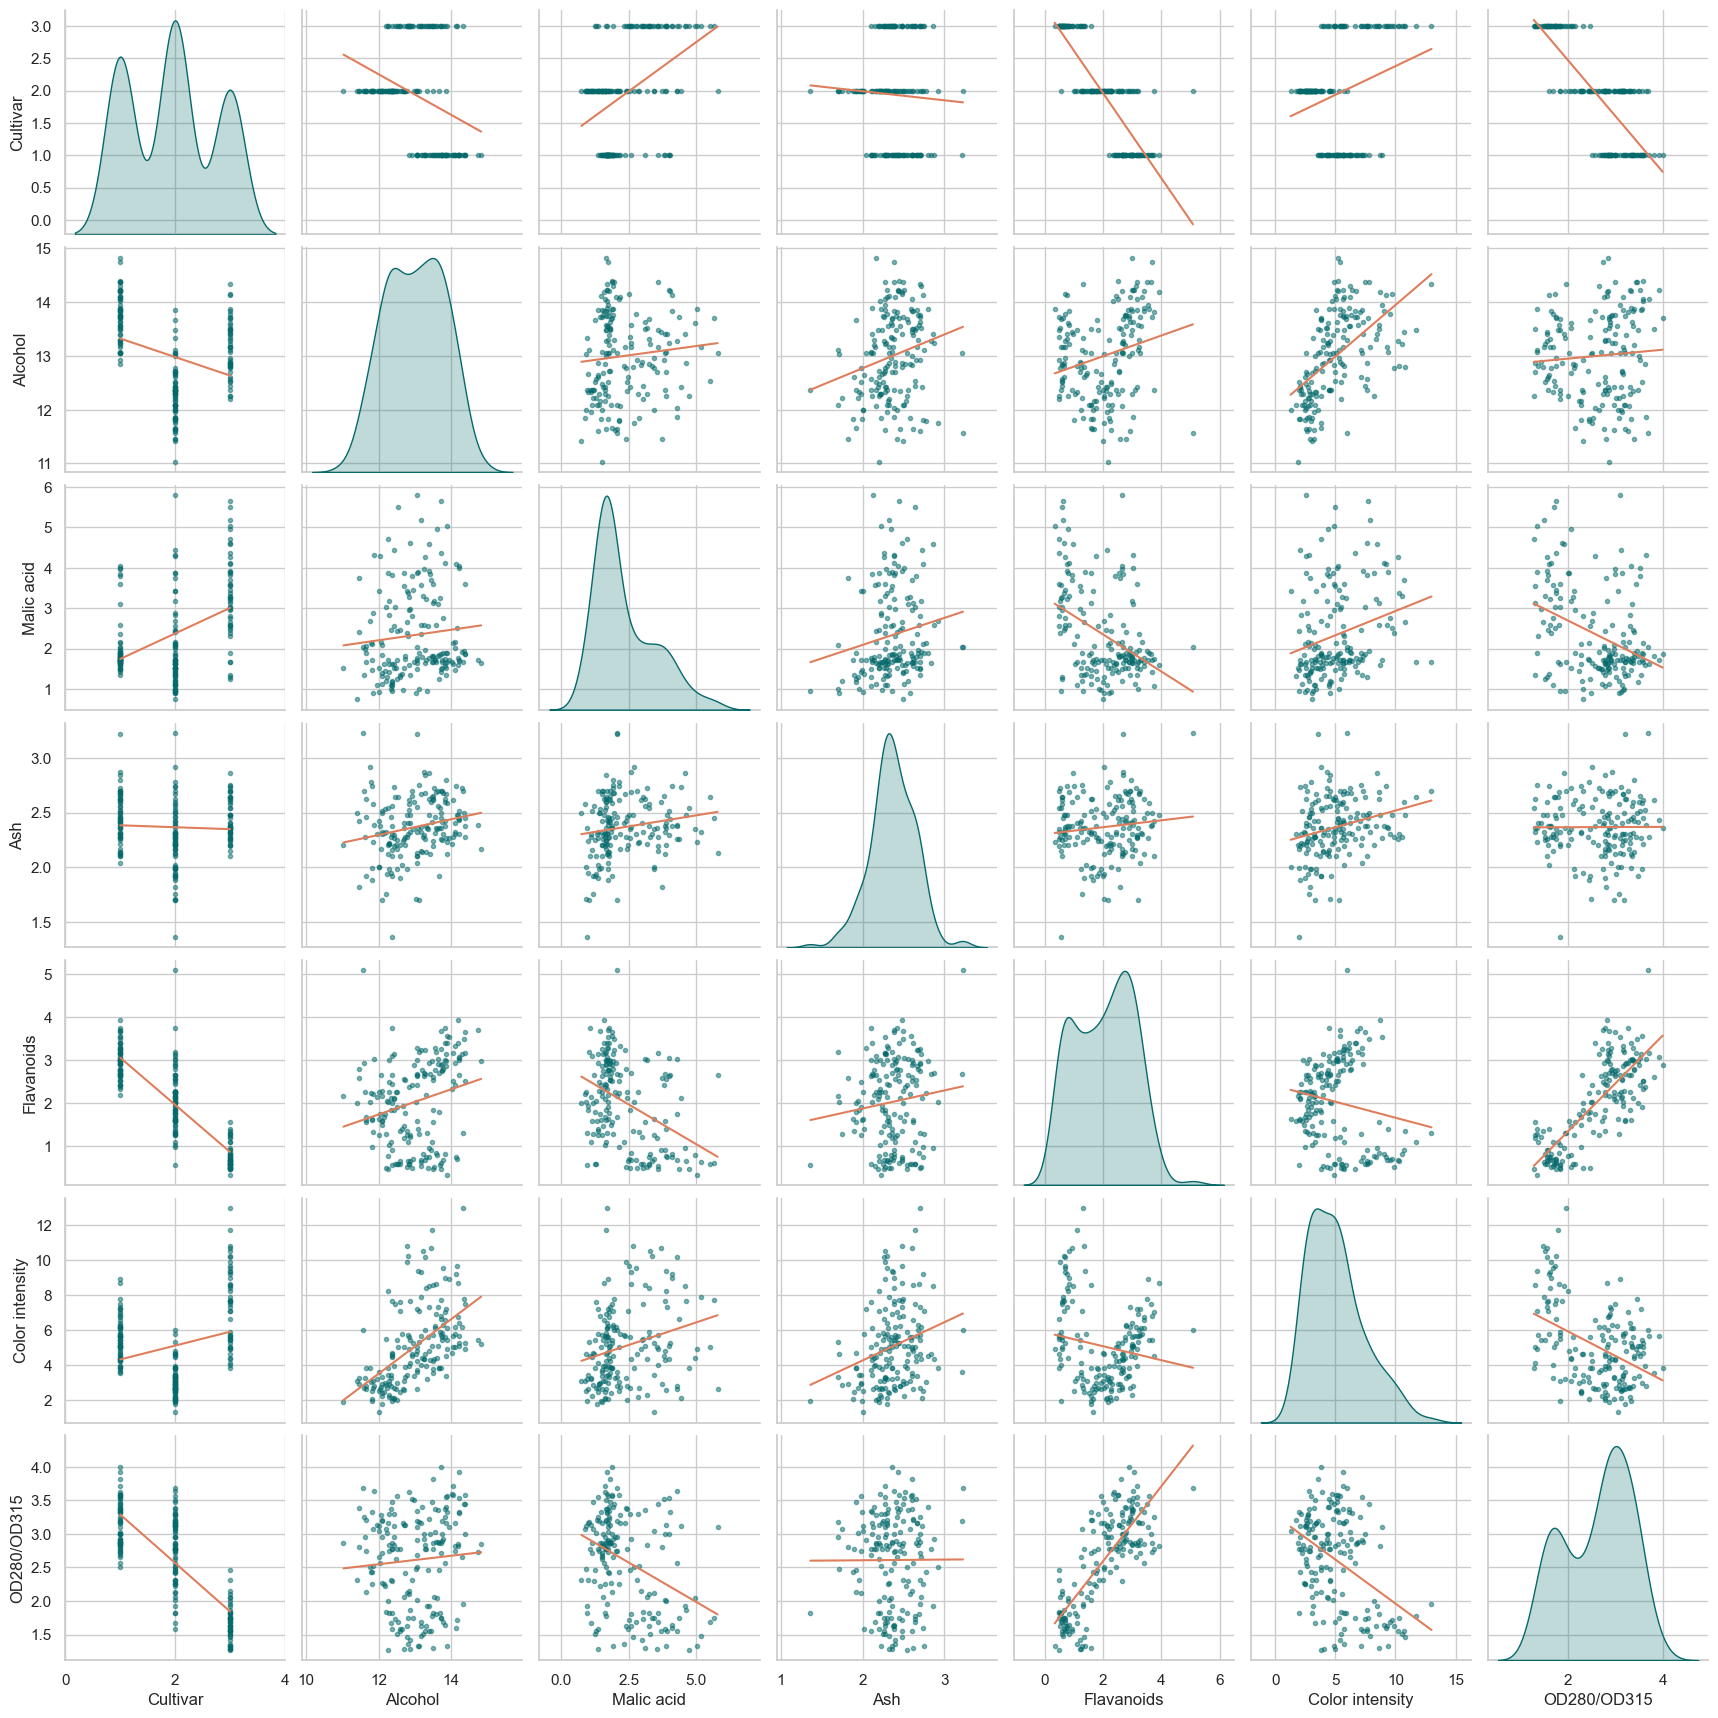

In [20]:
# Całość danych
# YOUR CODE HERE
sns.pairplot(data, diag_kind = 'kde', kind='reg',
             plot_kws=dict(color = '#05696b', marker='.', ci=None, scatter_kws=dict(alpha=0.5), line_kws=dict(linewidth=1.5, color='#de7e5d')),
             diag_kws=dict(color='#05696b'))

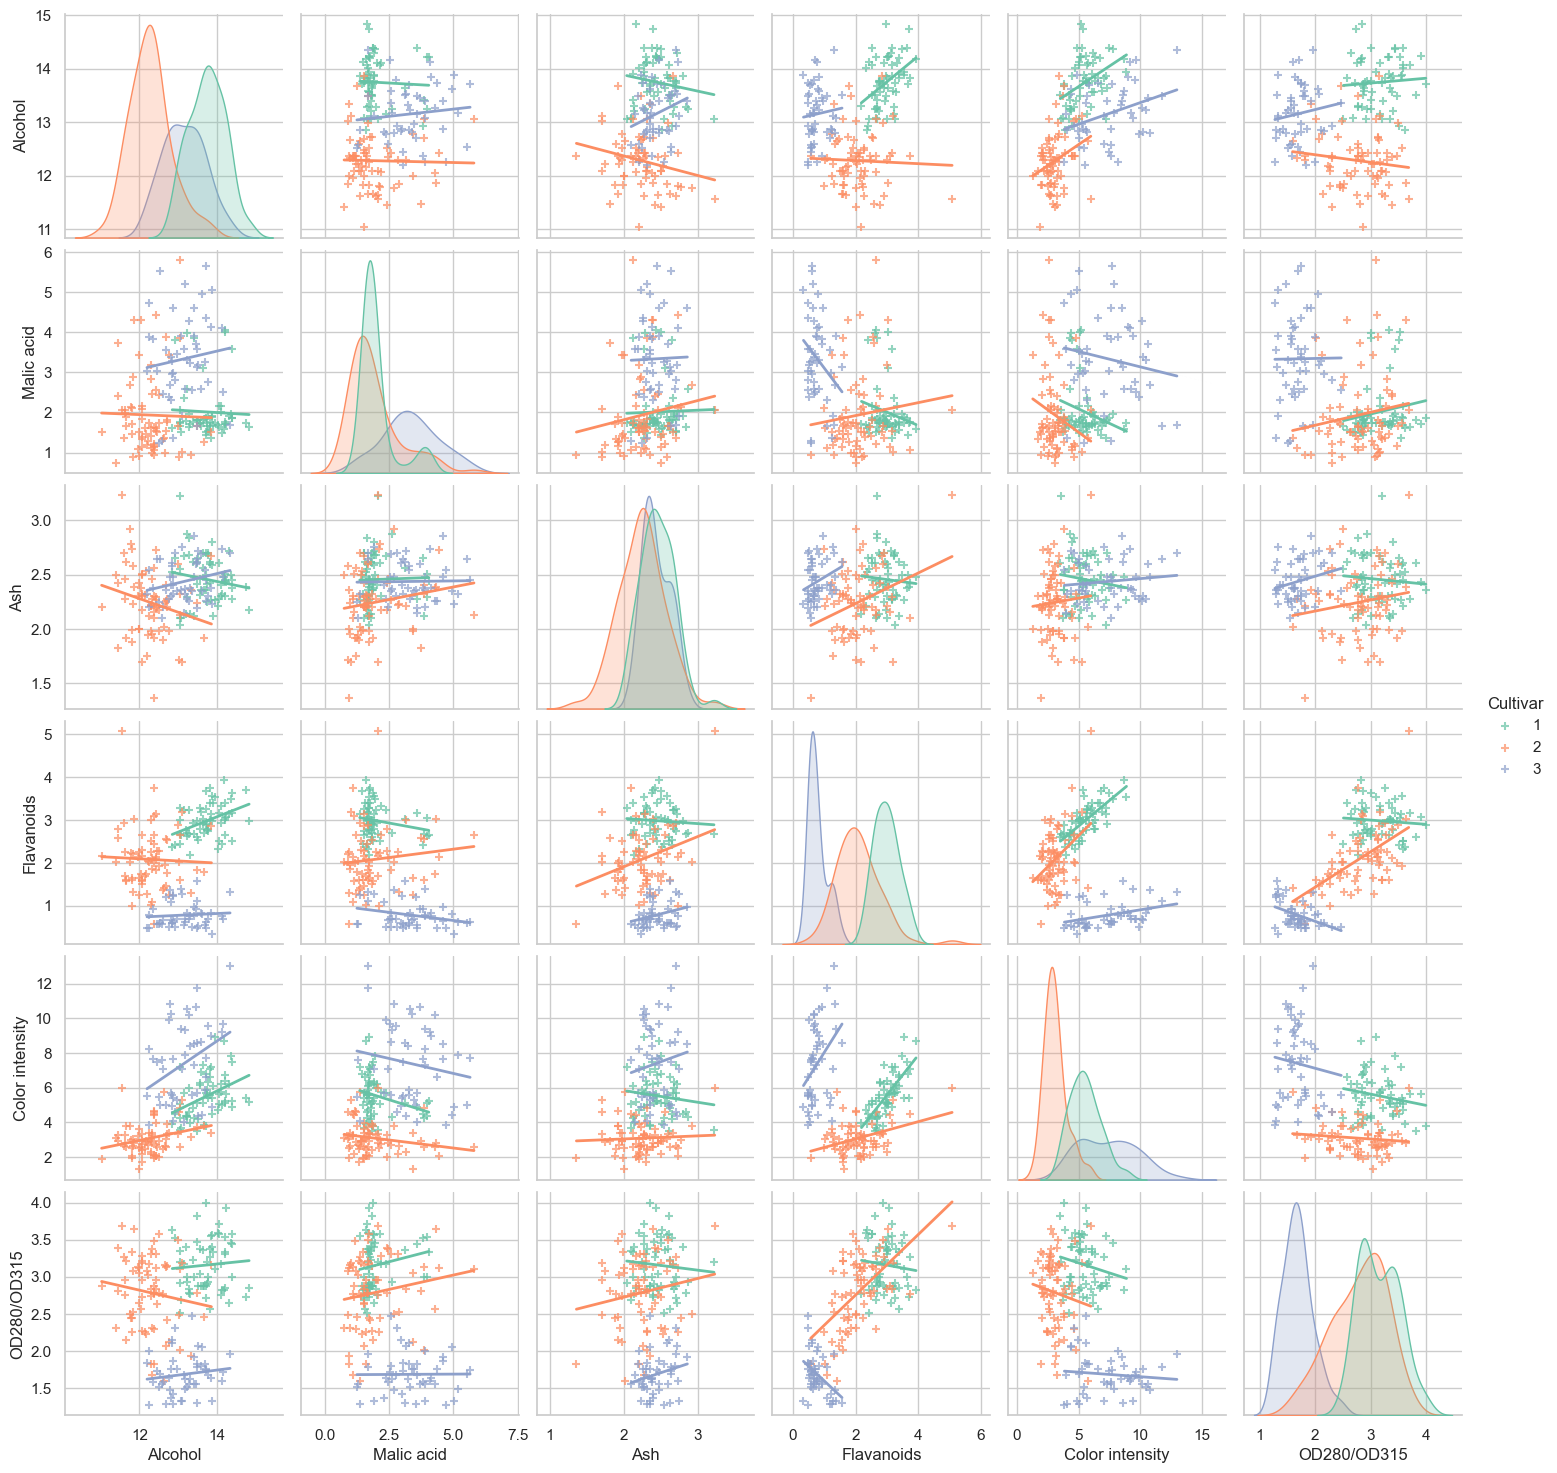

In [21]:
# Z podziałem na odmiany
# YOUR CODE HERE
sns.pairplot(data, hue='Cultivar', diag_kind = 'kde',  palette = "Set2", kind = 'reg',
             plot_kws=dict(ci=None, marker='+', scatter_kws=dict(alpha=0.7), line_kws=dict(linewidth=2)))